In [37]:
# Importing necessary libraries to allow for usage throughout the program. Libraries used are:
## pandas
## matplotlib
## seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Salary data retrieved from Kaggle (https://www.kaggle.com/datasets/sazidthe1/data-science-salaries/data)
# Loading the data from local library into the program with the variable "salary_df"

salary_df = pd.read_csv('data_science_salaries.csv')

# Printing the Data Frame's first five rows to ensure successful uploading of data

print(salary_df.head())


        job_title experience_level employment_type work_models  work_year  \
0   Data Engineer        Mid-level       Full-time      Remote     2024.0   
1   Data Engineer        Mid-level       Full-time      Remote     2024.0   
2  Data Scientist     Senior-level       Full-time      Remote     2024.0   
3  Data Scientist     Senior-level       Full-time      Remote     2024.0   
4    BI Developer        Mid-level       Full-time     On-site     2024.0   

  employee_residence    salary salary_currency  salary_in_usd  \
0      United States  148100.0             USD       148100.0   
1      United States   98700.0             USD        98700.0   
2      United States  140032.0             USD       140032.0   
3      United States  100022.0             USD       100022.0   
4      United States  120000.0             USD       120000.0   

  company_location company_size  
0    United States       Medium  
1    United States       Medium  
2    United States       Medium  
3    Unite

In [32]:
# CLEANING THE DATA(1) - using multiple different methods to assure we are working with clean data

# Checking to see if there are missing values that would skew data analysis results

missing_values = salary_df.isnull().sum()

print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Dropping any data entries with missing values

salary_df.dropna(inplace=True)


Missing values in each column:
job_title           1
employment_type     2
work_models         2
work_year           3
salary              1
salary_currency     2
salary_in_usd       2
company_location    2
dtype: int64


In [33]:
# CLEANING THE DATA(2) - using multiple different methods to assure we are working with clean data

# Auditing the data types in the program to assure ease of analysis later on

print("Current data types:")
print(salary_df.dtypes)

# Adjusting the column work_year to be an integer

salary_df['work_year'] = salary_df['work_year'].astype(int)

Current data types:
job_title              object
experience_level       object
employment_type        object
work_models            object
work_year             float64
employee_residence     object
salary                float64
salary_currency        object
salary_in_usd         float64
company_location       object
company_size           object
dtype: object


In [34]:
# CLEANING THE DATA(3) - using multiple different methods to assure we are working with clean data

# Making sure the data we are including only contains the years we want to look at.
# Removing 2020 as most work was remote and would skew any on-site vs. remote analysis

salary_df = salary_df[salary_df['work_year'] > 2020]

expected_years = [2024, 2023, 2022, 2021]
if salary_df['work_year'].isin(expected_years).all():
    print("Work year data is consistent.")
else:
    print("There are unexpected years in the data.")

Work year data is consistent.


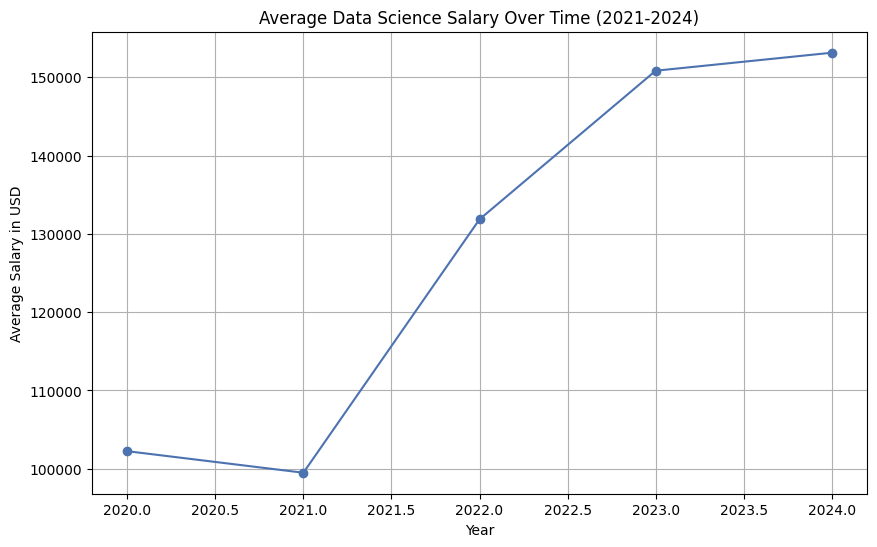

In [60]:
# ANALYZING THE DATA (1) - Looking at the trends within the salaries over time and job title & experience level

# Calculating the average salary by year using the columns 'work_year' and 'salary_in_usd'

average_salary_per_year = salary_df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Using matplotlib (imported in intital cell) to show visual of the average salary by year

plt.figure(figsize=(10, 6))
plt.plot(average_salary_per_year['work_year'], average_salary_per_year['salary_in_usd'], marker='o')
plt.title('Average Data Science Salary Over Time (2021-2024)')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()


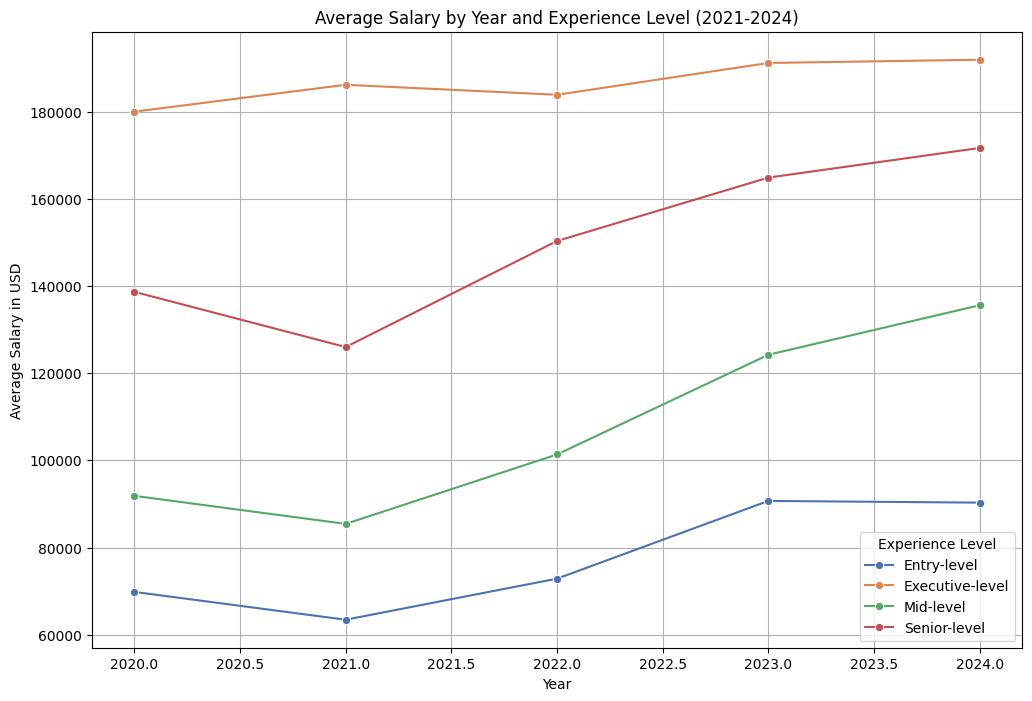

In [61]:
# ANALYZING THE DATA (2) - Looking at the trends within the salaries over time and job title & experience level

# The previous analysis does not take into account level of experience. Someone with a low-level ranking in 
# experience cannot expect to make a $150,000 salary to kick off their career in 2024. Further analysis is
# needed to show what a realistic salary is for varying experience levels

# Calculating the average salary by year and experience level

average_salary_by_year_experience = salary_df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Creating a picot table that allows the data to be visualized easier

alary_pivot = average_salary_by_year_experience.pivot(index='work_year', columns='experience_level', values='salary_in_usd')

# Using matplotlib and seaborn together to plot the new data

plt.figure(figsize=(12, 8))
sns.lineplot(data=average_salary_by_year_experience, x="work_year", y="salary_in_usd", hue="experience_level", marker='o')
plt.title('Average Salary by Year and Experience Level (2021-2024)')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.legend(title='Experience Level')
plt.show()

/var/folders/8t/pw9vdz9s7435sn94xt8cr_h80000gn/T/ipykernel_9125/3234826653.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary_in_usd', y='experience_level', data=average_salary_by_experience, palette='colorblind')


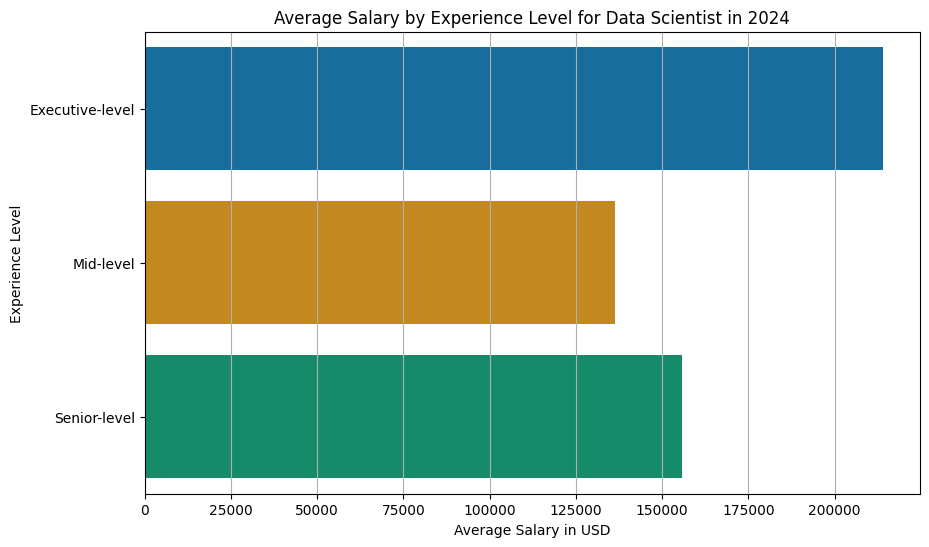

In [67]:
# ANALYZING THE DATA (3) - Looking at the trends within the salaries over time and job title & experience level

# Experience level is not the only piece of a career in data science that can have an effect on the expected salary. Job
# title can also change the expected amount. This function allows users to see the average salary of job titles within
# data science based on the experience level. 

# Creating the function for reuse

def job_title_by_experience(df, job_title):
    
    # Filter the DataFrame for the specified job title and the year 2024 (not interested in previous year's salaries)
    
    salary_df_filtered = salary_df[(salary_df['job_title'] == job_title) & (salary_df['work_year'] == 2024)]
    
    # Calculate the average salary by experience level
    
    average_salary_by_experience = salary_df_filtered.groupby('experience_level')['salary_in_usd'].mean().reset_index()
    
    # Using matplotlib and seaborn to create the bar chart
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='salary_in_usd', y='experience_level', data=average_salary_by_experience, palette='colorblind')
    plt.title(f'Average Salary by Experience Level for {job_title} in 2024')
    plt.xlabel('Average Salary in USD')
    plt.ylabel('Experience Level')
    plt.grid(axis='x')
    
    # Showing the the newly created plot
    
    plt.show()

# Calling the new function to show average salaries for the job title "Data Scientist"

job_title_by_experience(salary_df, "Data Scientist")

/var/folders/8t/pw9vdz9s7435sn94xt8cr_h80000gn/T/ipykernel_9125/3234826653.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary_in_usd', y='experience_level', data=average_salary_by_experience, palette='colorblind')


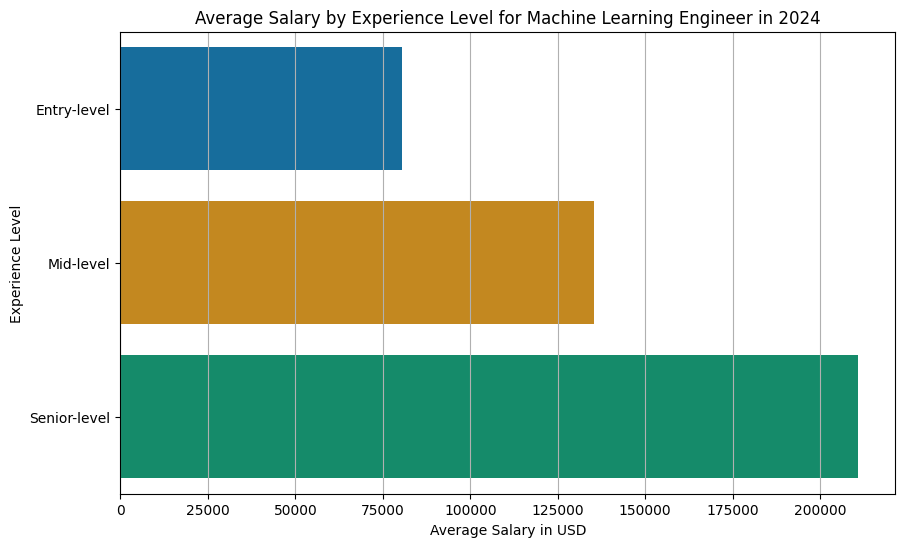

In [68]:
# ANALYZING THE DATA (4) - Looking at the trends within the salaries over time and job title & experience level

# The future warning above and below denotes that seaborn will be changing the "palette" parameter - a closer look at the new usage will
# be needed to assure no errors in the future

# Calling the created function again for a different job title - Machine Learning Engineer - to assure successful function definition

job_title_by_experience(salary_df, 'Machine Learning Engineer')

/var/folders/8t/pw9vdz9s7435sn94xt8cr_h80000gn/T/ipykernel_9125/1547662246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=salary_df_filtered, palette='coolwarm')


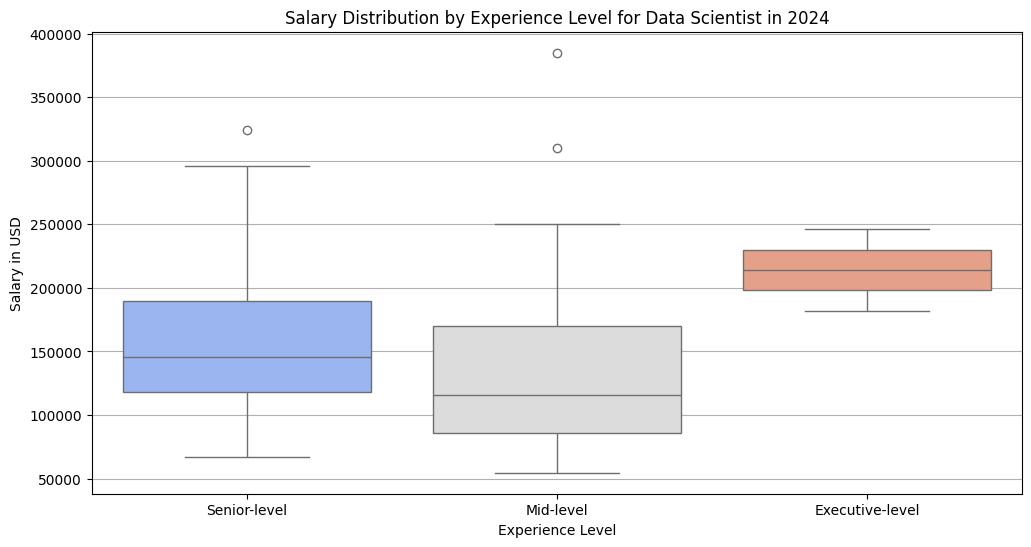

In [69]:
# ANALYZING THE DATA (5) - Looking at the trends within the salaries over time and job title & experience level

# While the average salary can give a good indication of a salary, it does not give all the information necessary. Depending on 
# the distribution of those salaries, we may not know degree to which that average salary is realistic. We will use a boxplot to
# show the salary distribution of each job title based on experience level.

# Creating the function for reuse

def salary_distribution_by_experience(df, job_title):
    
    # Filter the DataFrame for the specified job title and the year 2024 (not interested in previous year's salaries)
    
    salary_df_filtered = salary_df[(salary_df['job_title'] == job_title) & (salary_df['work_year'] == 2024)]
    
    # Plotting the boxplot
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='experience_level', y='salary_in_usd', data=salary_df_filtered, palette='coolwarm')
    
    plt.title(f'Salary Distribution by Experience Level for {job_title} in 2024')
    plt.xlabel('Experience Level')
    plt.ylabel('Salary in USD')
    plt.grid(axis='y')
    
    # Showing the the newly created plot
    
    plt.show()

# Calling the new function to show distribution of salaries for the job title "Data Scientist"

salary_distribution_by_experience(salary_df, "Data Scientist")